In [ ]:
# !pip install deepface

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random
import cv2
import os
import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential                       # Functional API 사용 예정.
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.preprocessing import sequence, image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.applications import mobilenet             # 비교적 작은 크기의 모형.
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from deepface.basemodels import VGGFace
warnings.filterwarnings('ignore')                               # Turn the warnings off.
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir('/content/drive/MyDrive/TensorFlow/99. Project/Face_Predict')

In [4]:
train_gender_datagen = ImageDataGenerator()
test_gender_datagen = ImageDataGenerator()

In [5]:
!pwd

/content/drive/MyDrive/TensorFlow/99. Project/Face_Predict


In [6]:
os.listdir()

['csv',
 'sample01.ipynb',
 'sample02.ipynb',
 'vgg_face_weights.h5',
 'kaggle.json',
 'UTKFace',
 'data01.csv',
 'Code',
 'keras_vggface',
 '.ipynb_checkpoints',
 'Train',
 'Test']

In [7]:
train_gender_generator = train_gender_datagen.flow_from_directory(
    './Train/Gender',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_gender_generator = test_gender_datagen.flow_from_directory(
    './Test/Gender',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5475 images belonging to 2 classes.
Found 1870 images belonging to 2 classes.


In [8]:
train_gender_generator.class_indices

{'Female': 0, 'Male': 1}

In [9]:
test_gender_generator.class_indices

{'Female': 0, 'Male': 1}

In [10]:
!ls -l

total 568098
drwx------ 2 root root      4096 Mar 18 08:41 Code
drwx------ 2 root root      4096 Mar 14 05:49 csv
-rw------- 1 root root   1060692 Mar 18 05:25 data01.csv
-rw------- 1 root root        66 Mar 18 00:39 kaggle.json
drwx------ 2 root root      4096 Mar 18 14:24 keras_vggface
-rw------- 1 root root    470357 Mar 14 07:00 sample01.ipynb
-rw------- 1 root root     89325 Mar 14 08:24 sample02.ipynb
drwx------ 3 root root      4096 Mar 19 04:06 Test
drwx------ 4 root root      4096 Mar 19 04:06 Train
drwx------ 2 root root      4096 Mar 18 00:42 UTKFace
-rw------- 1 root root 580085408 Mar 15 00:07 vgg_face_weights.h5


In [11]:
!pip install keras_vggface

In [12]:
!pip install keras_applications

In [13]:
import keras
keras.__version__

'2.12.0'

In [14]:
# !pip uninstall keras
# !pip install keras==2.12

In [15]:
# !pip install keras_applications

In [15]:
from keras_vggface.vggface import VGGFace

In [17]:
# #VGG-Face model
# model = Sequential()
# model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(Conv2D(4096, (7, 7), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Conv2D(4096, (1, 1), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Conv2D(2622, (1, 1)))
# model.add(Flatten())
# model.add(Activation('softmax'))

In [18]:
# model.summary()

In [19]:
# model.load_weights('./vgg_face_weights.h5')

In [20]:
# model.layers[-4].output

In [21]:
# for layer in model.layers[:-7] :
#   layer.trainable = False


In [22]:
# model.layers[-4].output

In [23]:
# model.input

In [16]:
vggface = VGGFace(model='vgg16', include_top=False, input_shape=(224, 224, 3),
                  pooling='avg')

58909280/58909280 [==============================] - 0s 0us/step


In [17]:
vggface.trainable = False

In [18]:
vggface.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [19]:
output_layer = vggface.get_layer('pool5').output
x = Flatten(name='Flatten')(output_layer)
x = Dense(units=512, activation='relu', name='Dense-1')(x)

x = Dropout(rate=0.5, name='Dropout')(x)
x = Dense(units=256, activation='relu', name='Dense-2')(x)

x = Dense(units=1, activation='sigmoid', name='Output')(x)

model_gender = Model(inputs=vggface.input, outputs=x)

In [20]:
# # output = Sequential()
# # input = Input([224, 224, 3], dtype=tf.float32, name='Input')
# output = Sequential()
# output = Conv2D(2, (1, 1), name='Prediction')(model.layers[-4].output)
# output = Flatten(name='Flatten')(output)
# output = Dense(units=512, activation='relu', name='Dense-1')(output)
# output = Dropout(rate=0.5, name='Dropout')(output)
# output = Dense(units=1, activation='sigmoid', name='Output')(output)

# model_gender = Model(inputs=model.input, outputs=output)

In [21]:
model_gender.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [29]:
# from keras_vggface import utils

In [26]:
# Hyperparameters.
n_epochs = 200
batch_size = 32
learn_rate = 0.001

In [27]:
optimizer = Adam(learning_rate=learn_rate)
model_gender.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
check_point = ModelCheckpoint(filepath='./Code/CheckPoint/{epoch:02d}_{val_loss:.3f}.h5',
                              monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [29]:
summary = model_gender.fit_generator(train_gender_generator,
                                     steps_per_epoch=4318 // batch_size,
                                     epochs=n_epochs,
                                     validation_data=test_gender_generator,
                                     verbose=1, callbacks=[early_stop, check_point])

Epoch 1/200
134/134 [==============================] - ETA: 0s - loss: 6.5029 - accuracy: 0.8929
Epoch 1: val_loss improved from inf to 1.41320, saving model to ./Code/CheckPoint/01_1.413.h5
134/134 [==============================] - 499s 4s/step - loss: 6.5029 - accuracy: 0.8929 - val_loss: 1.4132 - val_accuracy: 0.9316
Epoch 2/200
134/134 [==============================] - ETA: 0s - loss: 1.6486 - accuracy: 0.9324
Epoch 2: val_loss improved from 1.41320 to 0.45502, saving model to ./Code/CheckPoint/02_0.455.h5
134/134 [==============================] - 51s 385ms/step - loss: 1.6486 - accuracy: 0.9324 - val_loss: 0.4550 - val_accuracy: 0.9476
Epoch 3/200
134/134 [==============================] - ETA: 0s - loss: 0.5658 - accuracy: 0.9274
Epoch 3: val_loss improved from 0.45502 to 0.39069, saving model to ./Code/CheckPoint/03_0.391.h5
134/134 [==============================] - 26s 194ms/step - loss: 0.5658 - accuracy: 0.9274 - val_loss: 0.3907 - val_accuracy: 0.9187
Epoch 4/200
134/134

In [30]:
# summary.history['val_loss']

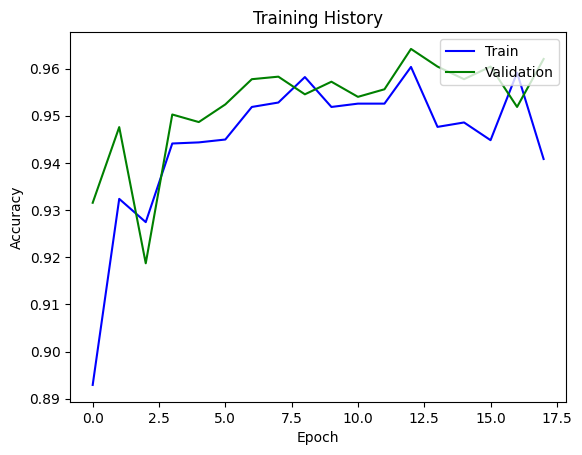

In [31]:
# 학습 history 출력.
n_skip = 0                 # Skip the first few steps.
plt.plot(summary.history['accuracy'][n_skip:], c="b")
plt.plot(summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [34]:
# model_gender.evaluate(test_gender_generator, verbose=0)

In [33]:
# 최종적으로 정확도 계산.
ACC = model_gender.evaluate(test_gender_generator, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC, 3)))

Test Accuracy : 0.962


In [ ]:
# def loadImage(filepath):
#   test_img = image.load_img(filepath, target_size=(224, 224))
#   test_img = image.img_to_array(test_img)
#   test_img = np.expand_dims(test_img, axis = 0)
#   test_img /= 255
#   return test_img

In [36]:
prediction = model_gender.predict_generator(test_gender_generator)
print(np.round(prediction[:, 0]))
print(prediction.shape)

[0. 1. 1. ... 1. 1. 0.]
(1870, 1)


In [37]:
# from PIL import Image

In [38]:
# img = Image.open('./Test/Gender/Female/27_1_2_20170116163338293.jpg.chip.jpg')
# plt.imshow(img)

In [39]:
class_gender = train_gender_generator.class_indices
class_gender

{'Female': 0, 'Male': 1}

In [40]:
train_gender_generator.filepaths[0]

'./Train/Gender/Female/20_1_0_20170103163040136.jpg.chip.jpg'

In [41]:
prediction[249]

array([0.09616406], dtype=float32)

In [42]:
class_gender

{'Female': 0, 'Male': 1}

In [43]:
class_gender

{'Female': 0, 'Male': 1}

In [44]:
class_gender_inv = {v:k for k,v in class_gender.items()}

In [46]:
class_gender_inv

{0: 'Female', 1: 'Male'}

In [64]:
df = pd.read_csv('./data01.csv')
df

,file_name,age,gender,race
0,8_0_0_20170110222913531.jpg.chip.jpg,8,0,0
1,86_1_0_20170110181934936.jpg.chip.jpg,86,1,0
2,76_1_0_20170110180142396.jpg.chip.jpg,76,1,0
3,80_1_0_20170110180523385.jpg.chip.jpg,80,1,0
4,84_1_0_20170120222457967.jpg.chip.jpg,84,1,0
...,...,...,...,...
23700,15_0_0_20170103201316167.jpg.chip.jpg,15,0,0
23701,14_1_0_20170109214428765.jpg.chip.jpg,14,1,0
23702,14_1_0_20170109214707410.jpg.chip.jpg,14,1,0
23703,15_1_4_20170103201201509.jpg.chip.jpg,15,1,4


In [65]:
df_20 = df[df['age'] // 10 == 2].reset_index(drop=True)
df_20

,file_name,age,gender,race
0,29_1_2_20170116172543850.jpg.chip.jpg,29,1,2
1,29_1_1_20170112205844564.jpg.chip.jpg,29,1,1
2,29_1_2_20170116175313289.jpg.chip.jpg,29,1,2
3,29_0_1_20170117104547721.jpg.chip.jpg,29,0,1
4,29_0_3_20170117022426014.jpg.chip.jpg,29,0,3
...,...,...,...,...
7339,20_0_3_20170104214325910.jpg.chip.jpg,20,0,3
7340,20_0_3_20170119151303902.jpg.chip.jpg,20,0,3
7341,20_0_1_20170113132622368.jpg.chip.jpg,20,0,1
7342,20_0_0_20170113184350758.jpg.chip.jpg,20,0,0


In [74]:
# def preprocess_image(img) :
#   x = image.img_to_array(img)
#   x = np.expand_dims(img, axis=0)
#   x = utils.preprocess_input(img, version=1)
#   return x

In [80]:
from keras_vggface import utils

In [86]:
# for idx in [random.randint(0, df_20.shape[0] - 1) for _ in range(5)]:
#   print(class_gender_inv[np.round(pred[0][0])])
#   file_name = df_20.iloc[idx, 0]
#   img = image.load_img('./UTKFace/' + file_name, target_size=(224, 224))

#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
#   x = utils.preprocess_input(x, version=1)
#   pred = model_gender.predict_generator(x)
#   # print('Result : ', utils.decode_predictions(pred))
#   plt.figure(figsize=(1.5, 1.5))
#   plt.axis('off')
#   plt.imshow(img)


Male


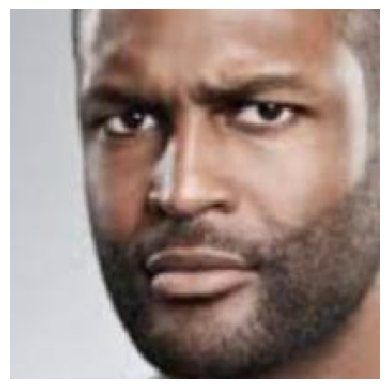

In [92]:
img = image.load_img('./UTKFace/29_0_3_20170117022426014.jpg.chip.jpg', target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1)
pred = model_gender.predict_generator(x)
# print('Result : ', utils.decode_predictions(pred))
plt.imshow(img)
plt.axis('off')
print(class_gender_inv[np.round(pred[0][0])])
# print(utils.decode_predictions(pred))